#  Assignment: CNN-Based Image Classification Using CIFAR-100
**Total Marks: 100**

**Instructions:**
- This is a programming and analysis-based assignment.
- Use TensorFlow/Keras to build your models.
- Add appropriate comments and explanations.
- Attempt all questions. Marks are indicated.


##  Section A: Data Exploration and Preprocessing (20 marks)

**Q1.** (5 marks) Load the CIFAR-100 dataset using `label_mode='fine'`. Print the shape of the training and test sets.

In [4]:
# Your code here
import tensorflow
from tensorflow.keras.datasets import cifar100

#loading the data set
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

#printing the shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Training data shape: (50000, 32, 32, 3) (50000, 1)
Test data shape: (10000, 32, 32, 3) (10000, 1)


**Q2.** (5 marks) Display 10 random images from the dataset with their class labels.

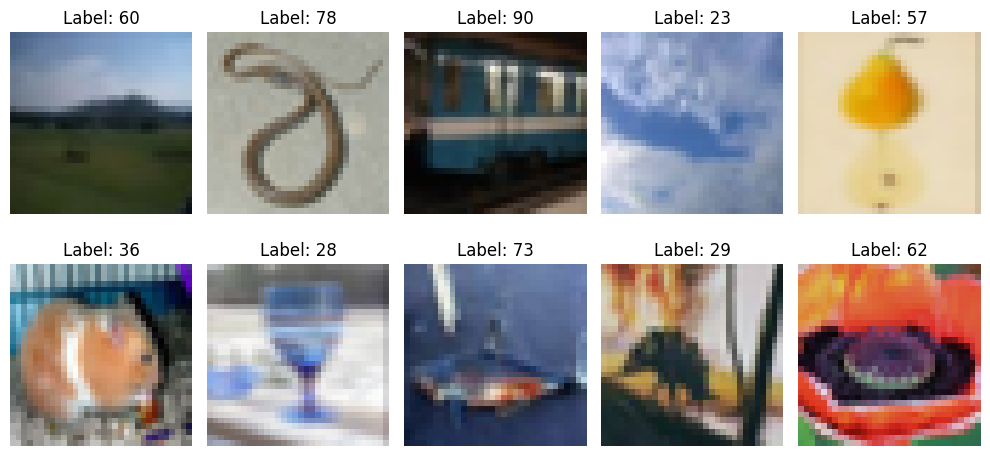

In [6]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100

(x_train, y_train), _ = cifar100.load_data(label_mode='fine')
#class_names = cifar100.load_data(label_mode='fine')[2].keys()

# Ploting 10 random images
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Q3.** (5 marks) Normalize the images and one-hot encode the labels. Explain why we perform both operations.

In [7]:
# Code:
# Your code here

from tensorflow.keras.utils import to_categorical

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


**Answer:**

_ normalization ensures all pixel values in the range of [0,1], that helps the model converge faster. one-hot encoding transforms labels into a format suitable for multi-class classification using softmax activation. _

**Q4.** (5 marks) What challenges do you expect when working with 100 classes instead of 10 (like CIFAR-10)?

_
Requires a larger model and longer training time.

Class imbalance becomes more problematic.

Increased complexity and risk of misclassification.

More data is needed per class to generalize well.

Harder to achieve high accuracy due to fine-grained differences.
_

##  Section B: Model Design & Training (40 marks)

**Q5.** (20 marks) Build and compile a CNN with at least two convolutional blocks and one dense output layer with 100 neurons. Use appropriate dropout and activation functions. Display the model summary.

In [8]:
# Your CNN model code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

**Q6.** (15 marks) Train the model for 15–20 epochs and plot training and validation accuracy curves.

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.0320 - loss: 4.4461 - val_accuracy: 0.1247 - val_loss: 3.8308
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.1034 - loss: 3.8712 - val_accuracy: 0.1867 - val_loss: 3.5006
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 87ms/step - accuracy: 0.1390 - loss: 3.6174 - val_accuracy: 0.2159 - val_loss: 3.3262
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.1674 - loss: 3.4676 - val_accuracy: 0.2498 - val_loss: 3.1565
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.1884 - loss: 3.3450 - val_accuracy: 0.2609 - val_loss: 3.0759
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.2029 - loss: 3.2710 - val_accuracy: 0.2829 - val_loss: 2.9564
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.2213 - loss: 3.1755 - val_accuracy: 0.2914 - val_loss: 2.9286
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.2225 - loss: 3.1580 - 

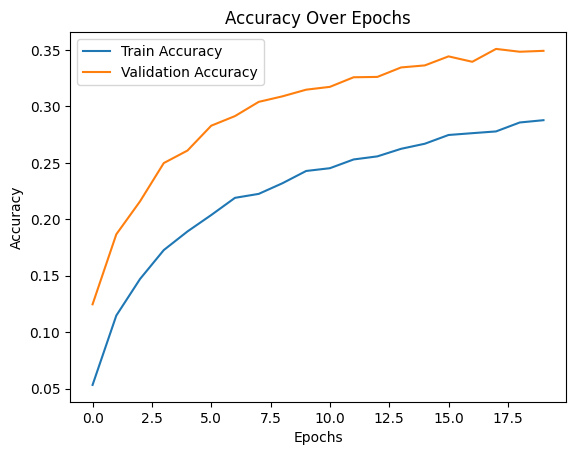

In [9]:
# Your training code here

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

# Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**Q7.** (10 marks) Report the final test accuracy. Discuss what it indicates about the model's performance.

In [10]:
# Model evaluation code here

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3555 - loss: 2.6042
Test Accuracy: 0.35409998893737793


_ Test accuracy reflects how well the model generalizes. For CIFAR-100, expect accuracy between 30–45% for a basic model. Improving the architecture, tuning, and adding data augmentation can increase performance. _

##  Section C: Model Experimentation (20 marks)

**Q8.** (10 marks) Add one more convolutional block to the CNN. Train and compare accuracy with your previous model. Which one performs better and why?

In [11]:
# Modified model code here

model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

# Evaluate
model2.evaluate(x_test, y_test)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 99ms/step - accuracy: 0.0219 - loss: 4.4758 - val_accuracy: 0.0945 - val_loss: 4.0083
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.0804 - loss: 3.9891 - val_accuracy: 0.1500 - val_loss: 3.6620
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.1171 - loss: 3.7224 - val_accuracy: 0.1823 - val_loss: 3.4626
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.1517 - loss: 3.5623 - val_accuracy: 0.2066 - val_loss: 3.3111
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 99ms/step - accuracy: 0.1782 - loss: 3.4170 - val_accuracy: 0.2326 - val_loss: 3.1870
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.1938 - loss: 3.3309 - val_accuracy: 0.2408 - val_loss: 3.0903
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.2024 - loss: 3.2475 - val_accuracy: 0.2630 - val_loss: 3.0000
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.2212 - loss: 3.1664 - 

[2.579921245574951, 0.3474000096321106]

_ The 3-block model often improves accuracy due to deeper feature extraction but may require more training time. Compare based on validation and test accuracy. _

**Q9.** (10 marks) Use `label_mode='coarse'` and repeat training with the original model (2 conv blocks). Compare the accuracy. Explain why there's a difference.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100

# Load coarse label data (20 classes)
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar100.load_data(label_mode='coarse')

# Normalize pixel values
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0

# One-hot encode labels
y_train_c = to_categorical(y_train_c, 20)
y_test_c = to_categorical(y_test_c, 20)

# Define original CNN with 2 conv blocks
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  # Note: changed to 20 classes
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train_c, y_train_c, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test_c, y_test_c)
print(f"Test Accuracy (Coarse labels): {test_acc:.4f}")


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 90ms/step - accuracy: 0.1245 - loss: 2.8041 - val_accuracy: 0.2752 - val_loss: 2.3794
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.2588 - loss: 2.4079 - val_accuracy: 0.3473 - val_loss: 2.1594
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.3029 - loss: 2.2560 - val_accuracy: 0.3662 - val_loss: 2.0837
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.3307 - loss: 2.1609 - val_accuracy: 0.4002 - val_loss: 1.9917
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.3509 - loss: 2.1066 - val_accuracy: 0.4127 - val_loss: 1.9471
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.3702 - loss: 2.0317 - val_accuracy: 0.4367 - val_loss: 1.8617
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.3780 - loss: 1.9983 - val_accuracy: 0.4389 - val_loss: 1.8330
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.3995 - loss: 1.9425 - 

_ With 20 classes, classification is easier. Expect higher accuracy compared to 100 classes because there are fewer distinctions to learn. _

##  Section D: Conceptual Questions (20 marks)

**Q10.** (5 marks) Explain the role of dropout in CNNs. What could happen if we remove dropout layers?

_ Dropout randomly deactivates neurons during training, preventing overfitting and promoting generalization. Without dropout, the model may memorize training data and perform poorly on unseen data. _

**Q11.** (5 marks) What is the role of the softmax activation in the output layer of your CNN?


_ Softmax converts raw output scores into probabilities for each class. It ensures that the output values sum to 1 and allows the model to select the class with the highest probability. _

**Q12.** (5 marks) What changes would you make to the CNN architecture to improve training speed and reduce overfitting?

_ Apply data augmentation.

Use a learning rate scheduler for better convergence.

Use batch normalization to stabilize training.

Reduce model complexity (e.g., fewer filters).

Add early stopping to prevent overtraining.
_